In [7]:
import numpy as np

In [1]:
#analyse words made of amino acids
import json
with open('dictionnaries.json','r') as fb:
    data = json.load(fb)

In [2]:
amino_acids = ['a','r','n','d','c','e','q','g','h','i','l','k','m','f','p','s','t','w','y','v']

In [3]:
data['french']

[u'abaissait',
 u'abaisse',
 u'abandon',
 u'abandonneriez',
 u'abandonnez',
 u'abattement',
 u'abattit',
 u'abattu',
 u'abattus',
 u'abbe',
 u'abc',
 u'abdication',
 u'abdomen',
 u'abdominales',
 u'abel',
 u'abime',
 u'abondamment',
 u'abondance',
 u'abonne',
 u'abonnes',
 u'abord',
 u'abordaient',
 u'aborde',
 u'about',
 u'aboutiraient',
 u'abrege',
 u'abregeat',
 u'abri',
 u'abriteras',
 u'abrutir',
 u'absence',
 u'absent',
 u'absolu',
 u'absolue',
 u'absolument',
 u'absorber',
 u'absorbera',
 u'absurde',
 u'absurdes',
 u'absurdites',
 u'abus',
 u'abusaient',
 u'abusent',
 u'academie',
 u'accabla',
 u'accablant',
 u'accablement',
 u'accablez',
 u'accaparer',
 u'accent',
 u'accepta',
 u'accepte',
 u'acceptee',
 u'accepter',
 u'acceptez',
 u'acces',
 u'accessoire',
 u'accident',
 u'accidents',
 u'accolade',
 u'accommodant',
 u'accommodement',
 u'accompagnait',
 u'accompagne',
 u'accompagner',
 u'accompli',
 u'accomplie',
 u'accomplir',
 u'accomplis',
 u'accord',
 u'accorde',
 u'accorde

In [4]:
data['french'][0]

u'abaissait'

In [8]:
np.sum([x not in amino_acids for x in data['french'][0]])

1

In [10]:
np.sum([x not in amino_acids for x in data['french'][100]])

0

In [11]:
non_aa_words = []
for word in data['french']:
    non_aa_words.append(np.sum([x not in amino_acids for x in word]))

In [14]:
non_aa_words.count(0)

3065

In [15]:
non_aa_words.count(0)/float(len(non_aa_words))

0.3764893747696843

In [17]:
# wich language is the most proteic ?
count_non_aa_words = []
freq_non_aa_words = []
list_lang = []
for k,v in data.items():
    non_aa_words = []
    for word in v:
        non_aa_words.append(np.sum([x not in amino_acids for x in word]))
    count_non_aa_words.append(non_aa_words.count(0))
    freq_non_aa_words.append(non_aa_words.count(0)/float(len(non_aa_words)))
    list_lang.append(k)

In [18]:
import pandas as pd
aa_words = pd.DataFrame({'lang': list_lang, 'nb_aa_words': count_non_aa_words, 'freq_aa_words': freq_non_aa_words})

In [19]:
aa_words.head()

,freq_aa_words,lang,nb_aa_words
0,0.430843,irish,542
1,0.230995,czech,4321
2,0.352113,interlingua,600
3,0.126133,inuktitut,974
4,0.282623,galician,444


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
aa_words.sort_values('freq_aa_words', inplace=True)

In [23]:
aa_words.head()

,freq_aa_words,lang,nb_aa_words
22,0.103357,kashubian,157
3,0.126133,inuktitut,974
23,0.146909,arapaho,777
8,0.198036,polish,484
7,0.220677,spanish,4888


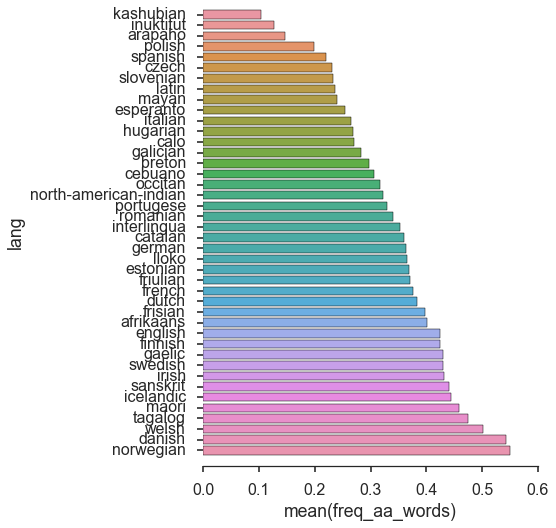

In [61]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
sns.barplot(x="freq_aa_words", y="lang", data=aa_words)
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
plt.show()

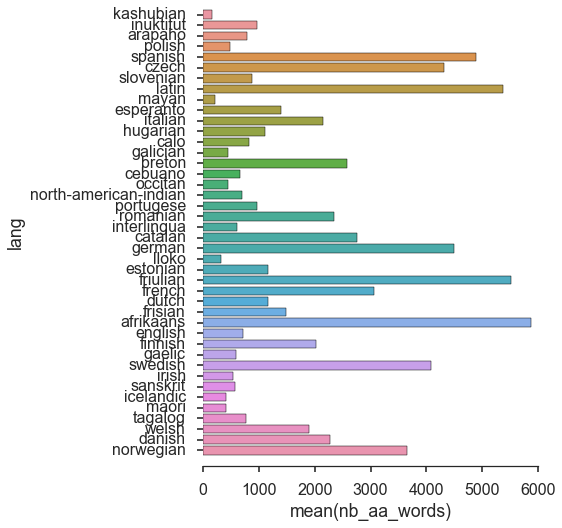

In [62]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
sns.barplot(x="nb_aa_words", y="lang", data=aa_words)
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
plt.show()

In [65]:
#selecting aa_words
aa_word_data = dict()
for k,v in data.items():
    collecting_list = []
    for word in v:
        if np.sum([x not in amino_acids for x in word]) == 0:
            collecting_list.append(word)
    aa_word_data[k] = collecting_list